In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0304/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 479 ms, sys: 11.5 ms, total: 491 ms
Wall time: 492 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.003918,0.0,-0.006743,0.0,-0.005412,0.00000,-0.005279,0.098687,0.019572,...,0.0,-0.000748,0.0,-0.001173,0.0,-0.019170,0.0,-0.008012,0.0,-0.013050
1,0.0,0.000806,0.0,0.000342,0.0,-0.003876,0.00000,-0.001987,0.000280,0.065125,...,0.0,0.002310,0.0,-0.002744,0.0,-0.016716,0.0,-0.009038,0.0,-0.017697
2,0.0,-0.000525,0.0,-0.007092,0.0,-0.006806,0.00000,-0.010131,0.017957,0.027200,...,0.0,-0.004447,0.0,-0.001238,0.0,-0.021435,0.0,-0.009584,0.0,-0.015251
3,0.0,-0.001494,0.0,0.001550,0.0,-0.006382,0.00000,-0.003422,0.000000,0.011647,...,0.0,0.008786,0.0,-0.000404,0.0,-0.028629,0.0,-0.006577,0.0,-0.010325
4,0.0,-0.004485,0.0,0.000729,0.0,-0.004547,0.00025,0.001520,0.052774,0.051450,...,0.0,0.003943,0.0,-0.001827,0.0,-0.012863,0.0,0.001267,0.0,-0.000991


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.00000,0.098687,0.439687,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000280,0.191231,0.00028,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,2.406495e-01,0.41786,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.017957,0.092096,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,4.513563e-07,0.033814,0.001271,0.000000e+00,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00025,0.052774,0.000018,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000020,0.002492,3.902047e-07,0.00000,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.000000e+00,0.103721,0.552221,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,0.000280,0.210739,0.00028,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,2.720751e-01,0.518708,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,0.018119,0.096470,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,4.513564e-07,3.439246e-02,0.001272,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.504417e-04,0.054191,0.000018,0.00000,0.0,0.0,0.0,...,0.000000e+00,2.038446e-05,0.002495,3.902048e-07,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.405033e-08,0.000154,0.000001,0.00000,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000e+00,8.526243e-09,0.000650,2.402814e-05,0.000000,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    37.000000
1    41.002058
2    42.999998
3    41.999955
4    37.999999
5    34.000000
6    24.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.003918,-0.006743,-0.005412,-0.005279,0.019572,0.129428,0.100599,0.013736,-0.020370,-0.018660,...,-0.020659,0.007434,0.007388,-0.005319,-0.016101,-0.000748,-0.001173,-0.019170,-0.008012,-0.013050
1,0.000806,0.000342,-0.003876,-0.001987,0.065125,0.214281,0.134596,0.005965,-0.003301,0.005783,...,-0.014122,-0.026177,0.040500,-0.000953,-0.003309,0.002310,-0.002744,-0.016716,-0.009038,-0.017697
2,-0.000525,-0.007092,-0.006806,-0.010131,0.027200,0.257693,0.105670,0.013493,-0.006314,-0.002554,...,-0.010022,-0.018330,0.036326,-0.004063,-0.006094,-0.004447,-0.001238,-0.021435,-0.009584,-0.015251
3,-0.001494,0.001550,-0.006382,-0.003422,0.011647,-0.031428,0.016921,0.003104,-0.003398,0.023509,...,-0.005032,-0.023763,0.066993,-0.001629,0.000725,0.008786,-0.000404,-0.028629,-0.006577,-0.010325
4,-0.004485,0.000729,-0.004547,0.001520,0.051450,-0.068192,-0.022758,0.006454,-0.006448,0.008779,...,0.009325,0.000105,0.047923,-0.007696,-0.001269,0.003943,-0.001827,-0.012863,0.001267,-0.000991


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.003910,-0.006721,-0.005397,-0.005265,0.019765,0.138177,0.105834,0.013831,-0.020164,-0.018487,...,-0.020447,0.007461,0.007415,-0.005305,-0.015972,-0.000747,-0.001173,-0.018987,-0.007980,-0.012965
1,0.000806,0.000342,-0.003868,-0.001985,0.067292,0.238970,0.144074,0.005983,-0.003295,0.005800,...,-0.014023,-0.025837,0.041331,-0.000953,-0.003304,0.002313,-0.002740,-0.016577,-0.008997,-0.017542
2,-0.000525,-0.007066,-0.006783,-0.010080,0.027574,0.293941,0.111455,0.013584,-0.006294,-0.002550,...,-0.009972,-0.018163,0.036994,-0.004055,-0.006075,-0.004437,-0.001238,-0.021207,-0.009538,-0.015135
3,-0.001492,0.001551,-0.006361,-0.003417,0.011715,-0.030939,0.017065,0.003109,-0.003392,0.023787,...,-0.005020,-0.023482,0.069288,-0.001628,0.000725,0.008825,-0.000404,-0.028223,-0.006555,-0.010272
4,-0.004475,0.000730,-0.004536,0.001521,0.052797,-0.065919,-0.022501,0.006475,-0.006427,0.008817,...,0.009368,0.000105,0.049090,-0.007666,-0.001269,0.003950,-0.001826,-0.012781,0.001268,-0.000991
5,0.004617,0.004025,-0.002989,0.001887,0.024650,0.015965,0.037950,0.009713,-0.002971,0.026487,...,0.004013,0.006050,0.053588,-0.008403,0.004798,0.008904,-0.002674,0.000109,0.001148,-0.001968
6,0.001702,0.001989,-0.003055,-0.001877,0.019591,-0.030519,0.067686,0.013043,0.001303,0.022938,...,-0.000124,0.007552,0.041745,-0.000967,0.004252,0.000864,-0.004048,-0.004882,0.000541,-0.000194


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.000000,0.0,0.000000,0.019765,0.138177,0.105834,0.013831,0.0,0.000000,...,0.000000,0.007461,0.007415,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.000806,0.000342,0.0,0.000000,0.067292,0.238970,0.144074,0.005983,0.0,0.005800,...,0.000000,0.000000,0.041331,0.0,0.000000,0.002313,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.027574,0.293941,0.111455,0.013584,0.0,0.000000,...,0.000000,0.000000,0.036994,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.001551,0.0,0.000000,0.011715,0.000000,0.017065,0.003109,0.0,0.023787,...,0.000000,0.000000,0.069288,0.0,0.000725,0.008825,0.0,0.0,0.000000,0.0
4,0.000000,0.000730,0.0,0.001521,0.052797,0.000000,0.000000,0.006475,0.0,0.008817,...,0.009368,0.000105,0.049090,0.0,0.000000,0.003950,0.0,0.0,0.001268,0.0


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    28.112008
1    28.192115
2    30.449810
3    26.434259
4    22.404861
5    28.054868
6    26.720194
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0304_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0304_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0304_true_and_forecasted_values_df

,True_count,Forecasted_count
0,37.000000,28.112008
1,41.002058,28.192115
2,42.999998,30.449810
3,41.999955,26.434259
4,37.999999,22.404861
5,34.000000,28.054868
6,24.000000,26.720194


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

11.51918609052945

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

10.582040429676159

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.19048122974219953, pvalue=0.682463404277226)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-2.6280606707608727

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 263 ms, sys: 66.9 ms, total: 330 ms
Wall time: 331 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-0.0082767 ,  0.00249529, -0.00760478, ..., -0.00506544,
         0.00376976,  0.00653112],
       [-0.00447482,  0.00145793, -0.00651479, ..., -0.0029071 ,
         0.00468612,  0.0044322 ],
       [-0.00565422,  0.00113809, -0.00724798, ..., -0.00422609,
         0.00418723,  0.00569487],
       ...,
       [ 0.0050441 ,  0.00062704,  0.00420499, ..., -0.00478667,
         0.01126373,  0.00197065],
       [ 0.00042331,  0.00454569,  0.00433338, ..., -0.00623542,
         0.00775123,  0.00153434],
       [ 0.00463653,  0.00355673,  0.00139046, ..., -0.00433946,
         0.01302254,  0.00155818]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 21.4 ms, sys: 187 µs, total: 21.6 ms
Wall time: 20.7 ms


In [52]:
loaded_npy_files[0]

array([[0.        , 0.00249529, 0.        , ..., 0.        , 0.00376976,
        0.00653112],
       [0.        , 0.00145793, 0.        , ..., 0.        , 0.00468612,
        0.0044322 ],
       [0.        , 0.00113809, 0.        , ..., 0.        , 0.00418723,
        0.00569487],
       ...,
       [0.0050441 , 0.00062704, 0.00420499, ..., 0.        , 0.01126373,
        0.00197065],
       [0.00042331, 0.00454569, 0.00433338, ..., 0.        , 0.00775123,
        0.00153434],
       [0.00463653, 0.00355673, 0.00139046, ..., 0.        , 0.01302254,
        0.00155818]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[39.55188 , 39.111507, 38.337597, ..., 32.095528, 32.913937,
        31.076149],
       [34.98513 , 32.240627, 37.051434, ..., 28.290043, 36.04046 ,
        37.28688 ],
       [37.423405, 37.27757 , 37.879116, ..., 28.40493 , 35.63922 ,
        29.015818],
       ...,
       [36.29843 , 38.674   , 38.595062, ..., 39.575237, 41.422966,
        46.697975],
       [40.535675, 37.490578, 51.87737 , ..., 49.384483, 46.332237,
        46.223392],
       [34.19114 , 41.63202 , 50.512527, ..., 40.022263, 45.10713 ,
        40.39373 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[39.55188 , 39.111507, 38.337597, ..., 32.095528, 32.913937,
        31.076149],
       [34.98513 , 32.240627, 37.051434, ..., 28.290043, 36.04046 ,
        37.28688 ],
       [37.423405, 37.27757 , 37.879116, ..., 28.40493 , 35.63922 ,
        29.015818],
       ...,
       [36.29843 , 38.674   , 38.595062, ..., 39.575237, 41.422966,
        46.697975],
       [40.535675, 37.490578, 51.87737 , ..., 49.384483, 46.332237,
        46.223392],
       [34.19114 , 41.63202 , 50.512527, ..., 40.022263, 45.10713 ,
        40.39373 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[24.93893566],
       [24.08101912],
       [24.46120744],
       [22.01342525],
       [19.89144797],
       [24.42917786],
       [23.03888502]])

In [63]:
ui_train

array([[46.35133715],
       [43.24156723],
       [47.26127291],
       [59.31909904],
       [48.27215014],
       [49.90798311],
       [60.88781347]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

27.483874961308068

In [66]:
y_traina = block_0304_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[37.00000004],
       [41.00205788],
       [42.99999831],
       [41.99995472],
       [37.99999945],
       [34.00000014],
       [24.00000014]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

1.0

In [70]:
np.mean(output, axis = 0)

array([35.26827 , 33.268917, 35.26429 , 36.467262, 31.473557, 35.28134 ,
       36.817566], dtype=float32)

In [71]:
sum_forecasted_values

0    28.112008
1    28.192115
2    30.449810
3    26.434259
4    22.404861
5    28.054868
6    26.720194
dtype: float64

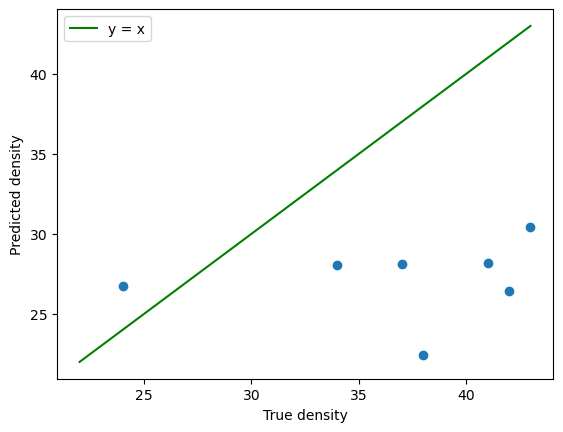

In [72]:
plt.scatter(block_0304_true_and_forecasted_values_df['True_count'], block_0304_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([22, 43], [22, 43], color='green', label='y = x')
plt.legend()
plt.show()

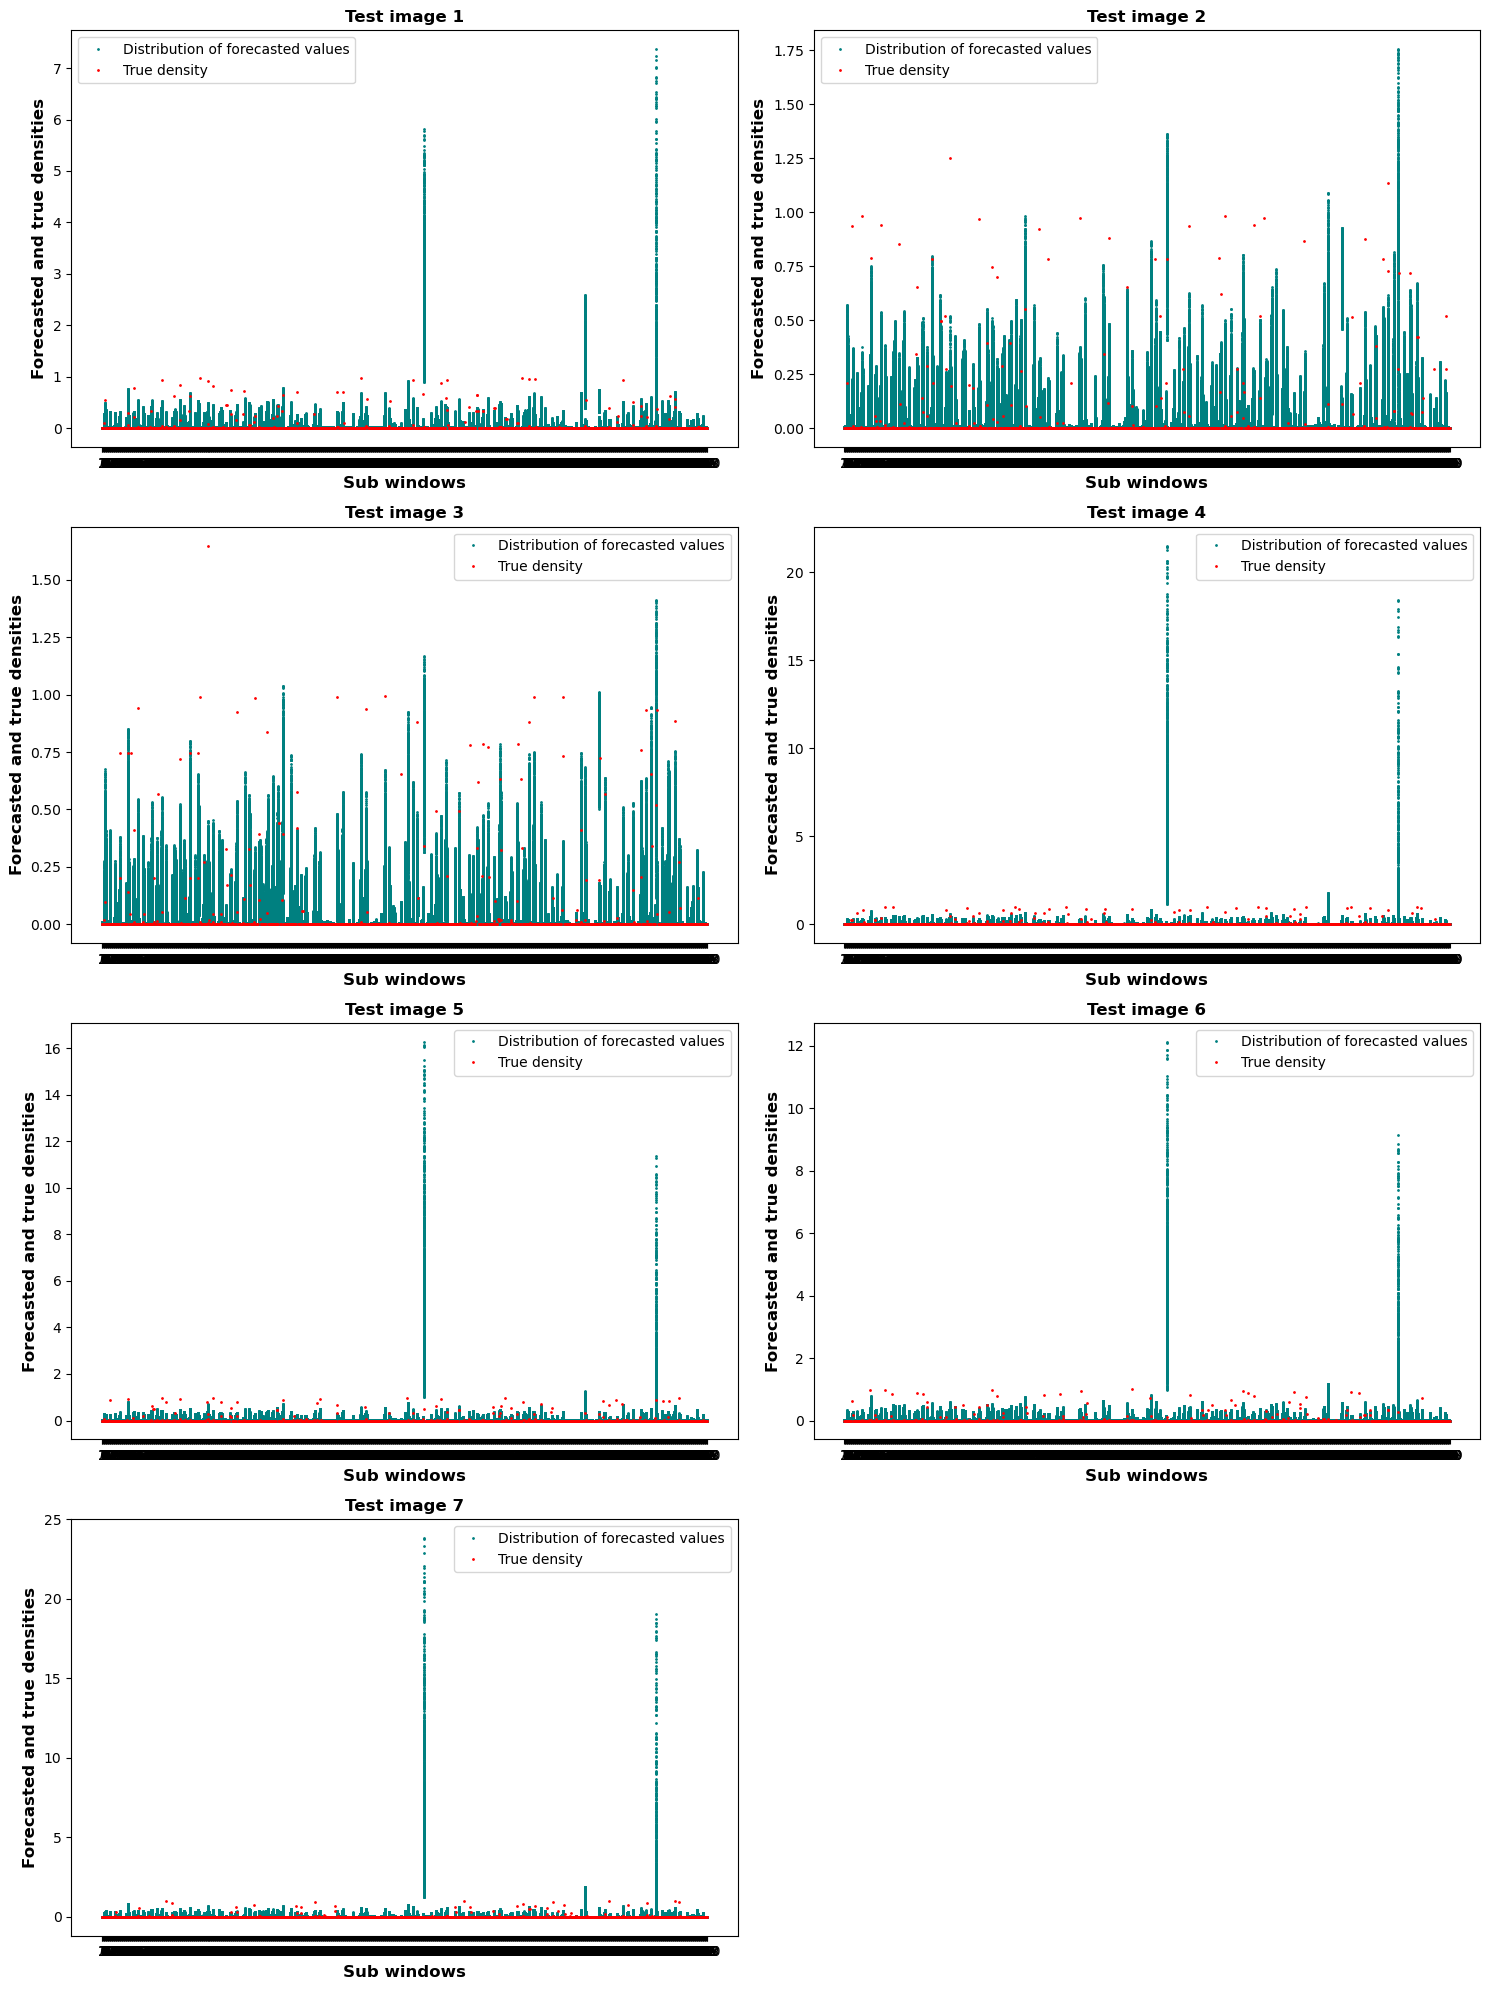

CPU times: user 26.7 s, sys: 810 ms, total: 27.5 s
Wall time: 27.1 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 